# Support file processing
File to do all pre-processing needed that shouldn't be uploaded

## Generating all land use maps...

Loading inventory of SOC Foreground files

In [3]:
# modules
import polars as pl
import numpy as np
import sbtn_leaf.map_calculations as mc
import sbtn_leaf.map_plotting as mp

# files
files_inventory = pl.read_csv("../data/SOC_Foreground_files/foreground_occupation_file_index.csv")

In [4]:
files_inventory.head()

file_name,land_use,path
str,str,str
"""Occ_foreground_Broadleaf_Decid…","""Broadleaf_Deciduous_Boreal_dry""","""../data/soc_Raster_Foreground_…"
"""Occ_foreground_Broadleaf_Decid…","""Broadleaf_Deciduous_Boreal_moi…","""../data/soc_Raster_Foreground_…"
"""Occ_foreground_Broadleaf_Decid…","""Broadleaf_Deciduous_Cold_tempe…","""../data/soc_Raster_Foreground_…"
"""Occ_foreground_Broadleaf_Decid…","""Broadleaf_Deciduous_Cold_tempe…","""../data/soc_Raster_Foreground_…"
"""Occ_foreground_Broadleaf_Decid…","""Broadleaf_Deciduous_Subtropica…","""../data/soc_Raster_Foreground_…"


Now creating the loop

In [18]:
mp.inspect_raster("../data/SOC_Foreground_files/Occ_foreground_Broadleaf_Deciduous_Boreal_dry.tif")

File: ../data/SOC_Foreground_files/Occ_foreground_Broadleaf_Deciduous_Boreal_dry.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: None

--- Raster Metadata ---
TIFFTAG_SOFTWARE: MATLAB 9.8, Mapping Toolbox 4.10
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float64
  Min Value: 50.9646539740672
  Max Value: 27020.6993905685
  Mean Value: 508.318560865058
  Standard Deviation: 656.1209725770067


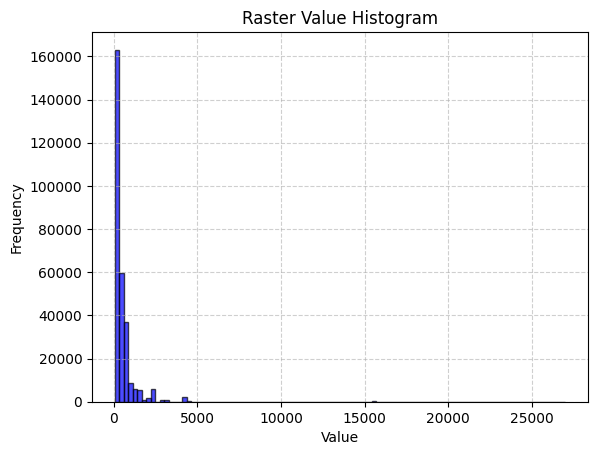

In [27]:
mp.plot_raster_histogram("../data/SOC_Foreground_files/Occ_foreground_Broadleaf_Deciduous_Boreal_dry.tif", bins=100)

In [15]:
output_folder = "../data/land_use/"

In [28]:
for row in files_inventory.iter_rows(named=True):
    input_path = row["path"]
    land_use_type = row["land_use"]
    output_path = output_folder + "lu_" + land_use_type + ".tif"

    print(f"Creating a land use raster for {land_use_type}")

    mc.binarize_raster(input_path, output_path)
    print(f"{land_use_type} rasterized succesfully!\n")

Creating a land use raster for Broadleaf_Deciduous_Boreal_dry
Broadleaf_Deciduous_Boreal_dry rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Boreal_moist
Broadleaf_Deciduous_Boreal_moist rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Cold_temperate_dry
Broadleaf_Deciduous_Cold_temperate_dry rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Cold_temperate_moist
Broadleaf_Deciduous_Cold_temperate_moist rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Subtropical
Broadleaf_Deciduous_Subtropical rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Tropical
Broadleaf_Deciduous_Tropical rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Warm_temperate_dry
Broadleaf_Deciduous_Warm_temperate_dry rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Warm_temperate_moist
Broadleaf_Deciduous_Warm_temperate_moist rasteri

Inpsecting...

In [29]:
test_file = "../data/land_use/lu_Irrigated_Maize_residues_left_on_the_field.tif"

In [30]:
mp.inspect_raster(test_file)

File: ../data/land_use/lu_Irrigated_Maize_residues_left_on_the_field.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: 255.0

--- Raster Metadata ---
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: uint8
  Min Value: 1
  Max Value: 1
  Mean Value: 1.0
  Standard Deviation: 0.0


Raster has 1 different values. Min: 1.00. Max: 1.00


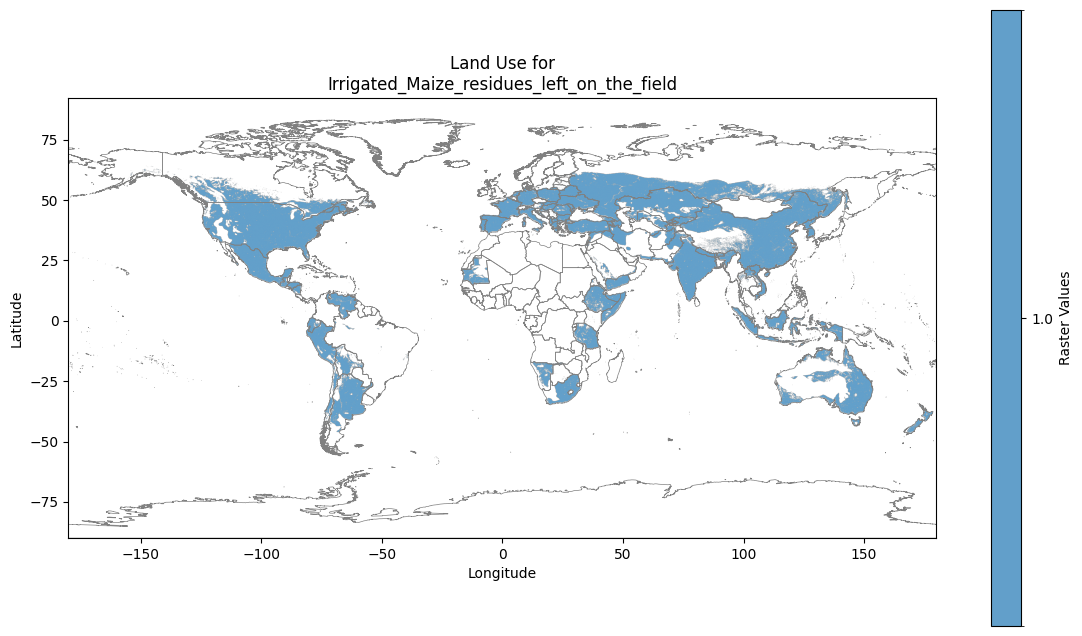

In [31]:
mp.plot_raster_on_world_extremes_cutoff(test_file, "Land Use for\nIrrigated_Maize_residues_left_on_the_field", alpha=0)

# MODIS DAAC (MCD12C1) Data download and processing
So some of the forests maps are wrong, and then there's a need to genearte them again. The first thing is to actually download the original Evergreen and Decidious data layers from MODIS DAAC (MCD12C1). This dataset can be found [here](https://www.earthdata.nasa.gov/data/catalog/lpcloud-mcd12c1-061)

Importing the needed modules

After converting the needed files into GeoTiff, examining them...

Filepaths

In [2]:
modis_16_fp = "../data/land_use/MCD12C1_Type1_2016.tif"

Opening 2016 land use map that coincides with soil maps

In [4]:
mp.inspect_raster(modis_16_fp)

File: ../data/land_use/MCD12C1_Type1_2016.tif
Driver: GTiff
Width, Height: 7200, 3600
Number of Bands: 1
CRS: GEOGCS["Unknown datum based upon the Clarke 1866 ellipsoid",DATUM["Not specified (based on Clarke 1866 spheroid)",SPHEROID["Clarke 1866",6378206.4,294.978698213898,AUTHORITY["EPSG","7008"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
Bounds: BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
Pixel Size: (0.05, 0.05)
No-data Value: 255.0

--- Raster Metadata ---
ALGORITHMPACKAGEACCEPTANCEDATE: 2001-01-01
ALGORITHMPACKAGEMATURITYCODE: LAUNCH
ALGORITHMPACKAGENAME: MOD12C1
ALGORITHMPACKAGEVERSION: V2.0
ASSOCIATEDINSTRUMENTSHORTNAME.1: MODIS
ASSOCIATEDINSTRUMENTSHORTNAME.2: MODIS
ASSOCIATEDPLATFORMSHORTNAME.1: Terra
ASSOCIATEDPLATFORMSHORTNAME.2: Aqua
ASSOCIATEDSENSORSHORTNAME.1: MODIS
ASSOCIATEDSENSORSHORTNAME.2: MODIS
AUTOMATICQUALITYFLAG.1: Passed
AUTOMATICQUALITYFLAGEXPLANATION.1: To 

Raster has 17 different values. Min: 0.00. Max: 16.00


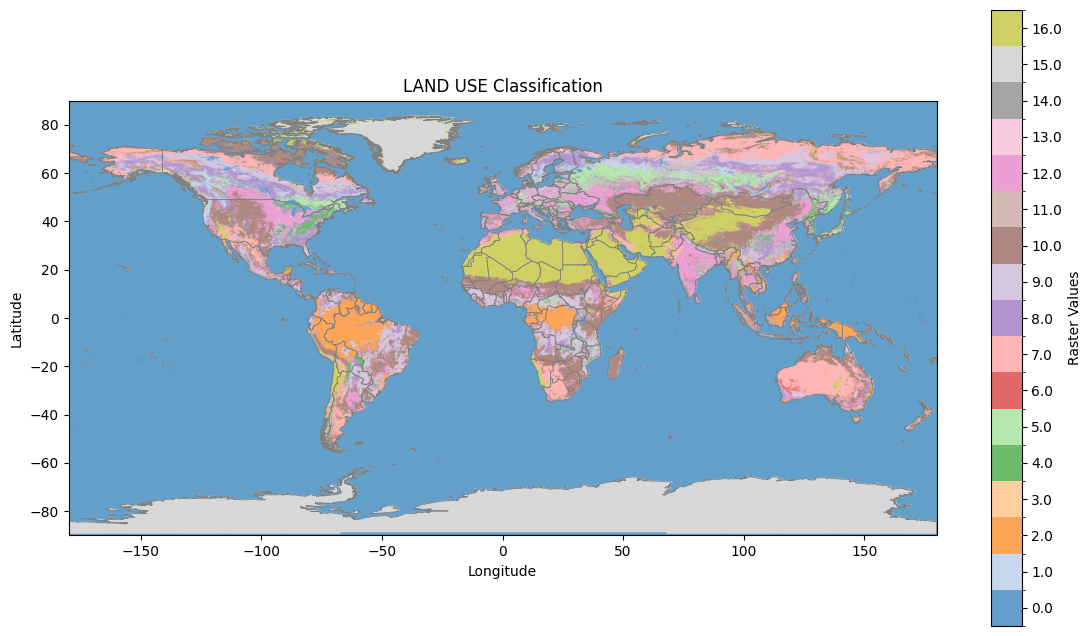

In [5]:
mp.plot_raster_on_world_extremes_cutoff(modis_16_fp, "LAND USE Classification")

Which looks ok. Now creating 4 separate rasters for each forest class, which are:
| Land Use Type | Value |
|:----|:---:|
|Evergreen Needleleaf Forests| 1 |
|Evergreen Broadleaf Forests| 2 |
|Deciduous Needleleaf Forests| 3 |
|Deciduous Broadleaf Forests | 4 | 

In [6]:
import rioxarray as rxr
da = rxr.open_rasterio(modis_16_fp, masked=True)

In [8]:
da_eg_ndl= da.where(da==1)
da_eg_brd = da.where(da==2)
da_dec_ndl = da.where(da==3)
da_dec_brd= da.where(da==4)

Saving them...

In [11]:
da_eg_ndl.rio.to_raster("../data/land_use/MCD12C1_Type1_2016_evergreen_needle.tif")
da_eg_brd.rio.to_raster("../data/land_use/MCD12C1_Type1_2016_evergreen_broadleaf.tif")
da_dec_ndl.rio.to_raster("../data/land_use/MCD12C1_Type1_2016_decidious_needle.tif")
da_dec_brd.rio.to_raster("../data/land_use/MCD12C1_Type1_2016_decidious_broadleaf.tif")

Raster has 1 different values. Min: 1.00. Max: 1.00


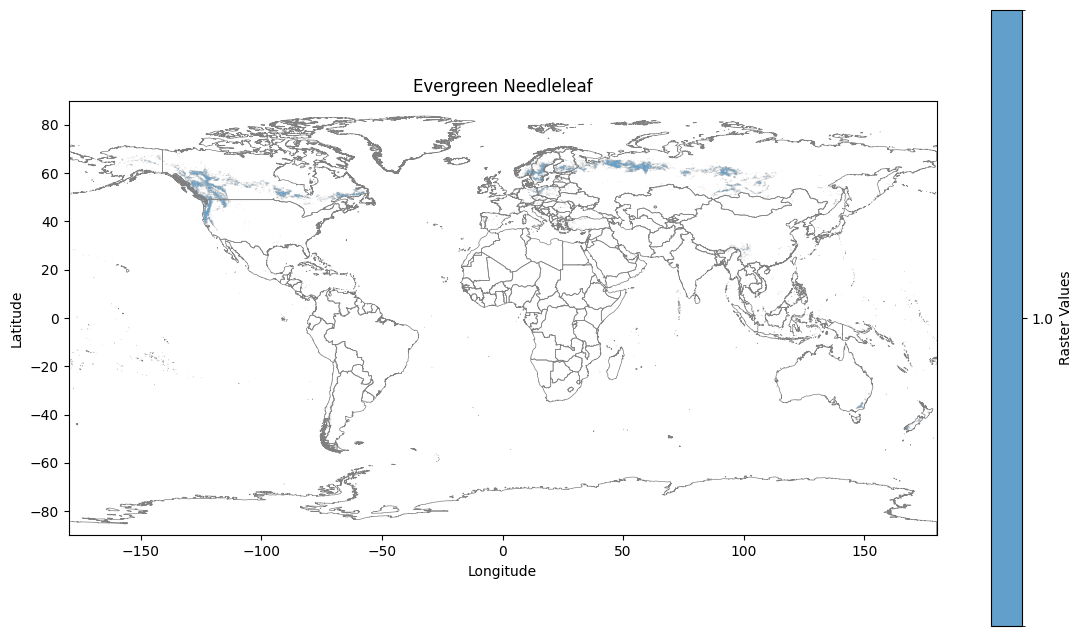

In [12]:
mp.plot_raster_on_world_extremes_cutoff("../data/land_use/MCD12C1_Type1_2016_evergreen_needle.tif", "Evergreen Needleleaf", alpha=0)

Raster has 1 different values. Min: 2.00. Max: 2.00


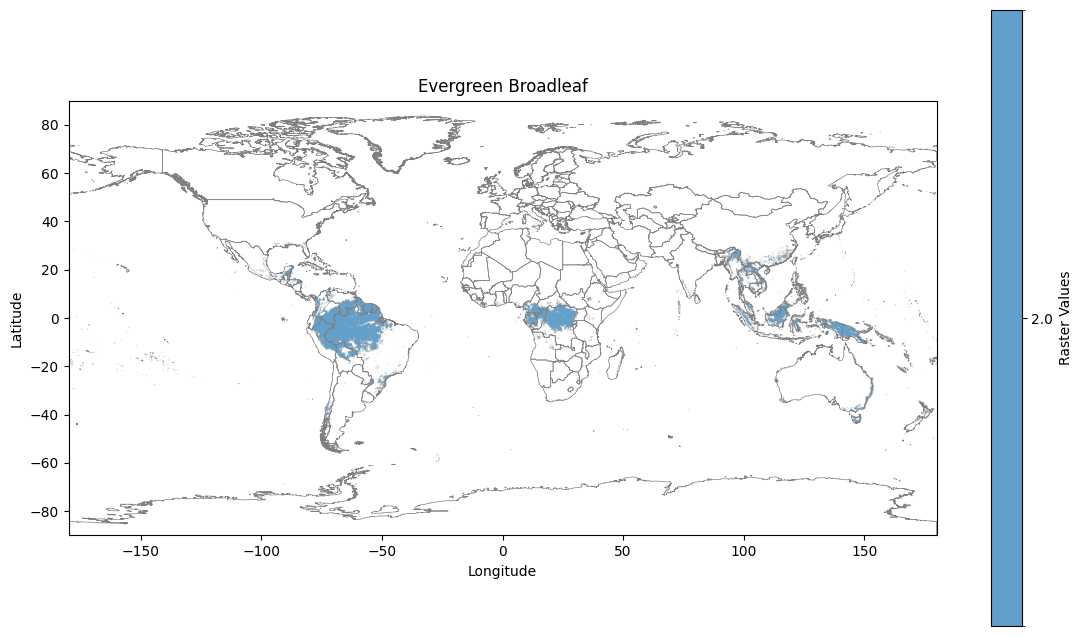

In [13]:
mp.plot_raster_on_world_extremes_cutoff("../data/land_use/MCD12C1_Type1_2016_evergreen_broadleaf.tif", "Evergreen Broadleaf", alpha=0)

Raster has 1 different values. Min: 3.00. Max: 3.00


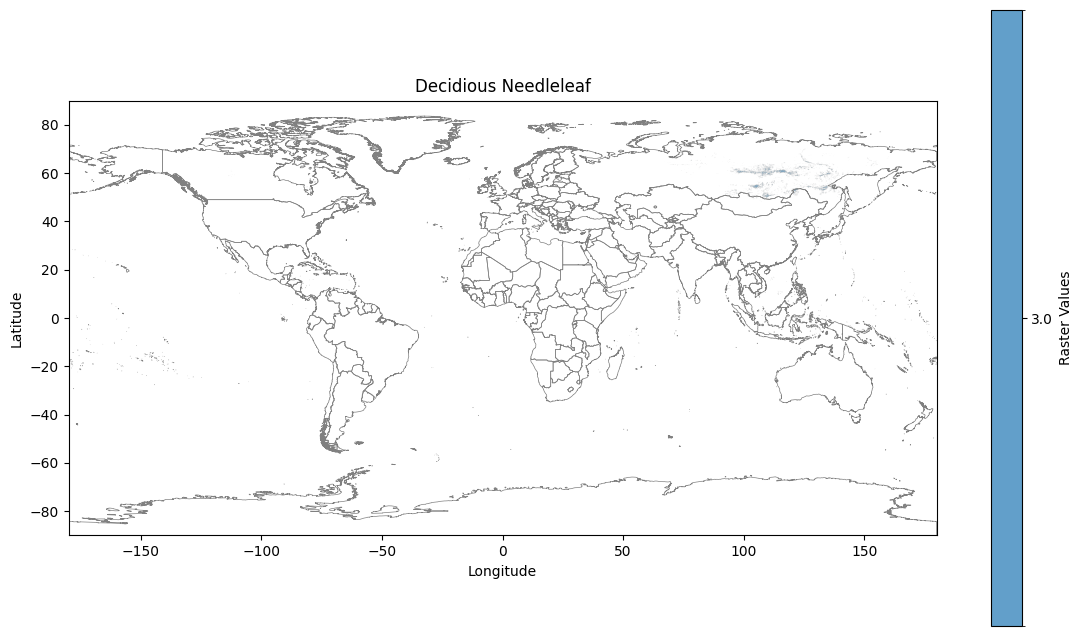

In [14]:
mp.plot_raster_on_world_extremes_cutoff("../data/land_use/MCD12C1_Type1_2016_decidious_needle.tif", "Decidious Needleleaf", alpha=0)

Raster has 1 different values. Min: 4.00. Max: 4.00


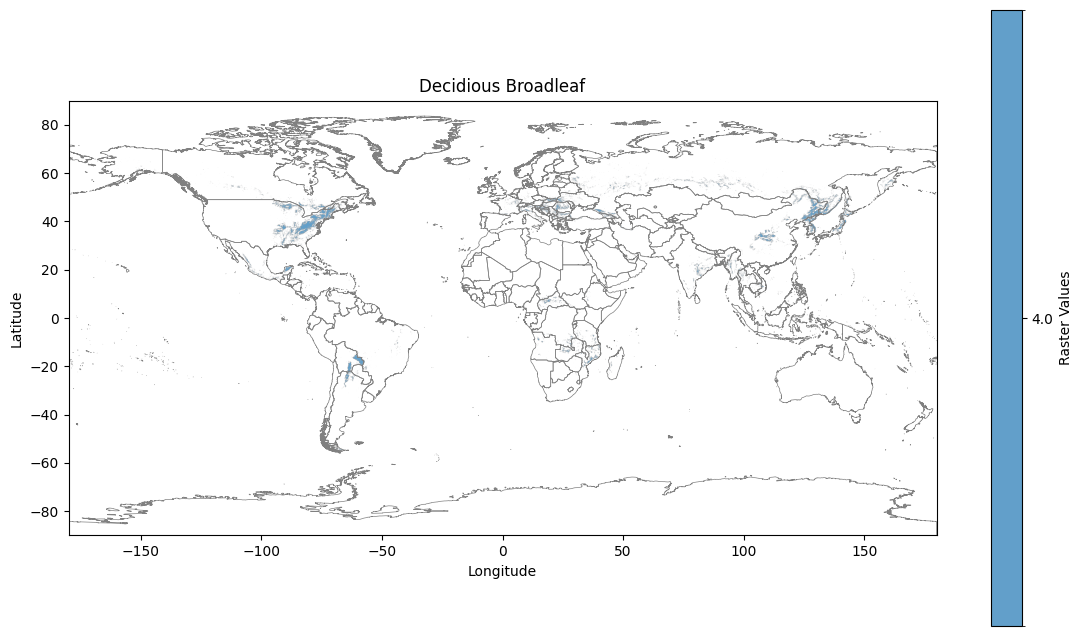

In [15]:
mp.plot_raster_on_world_extremes_cutoff("../data/land_use/MCD12C1_Type1_2016_decidious_broadleaf.tif", "Decidious Broadleaf", alpha=0)

So this maps look very different than the ones from the SOC files and the actual SOC LU combination is just empty, hence why it wasn't working